
Experiment 3b - 1


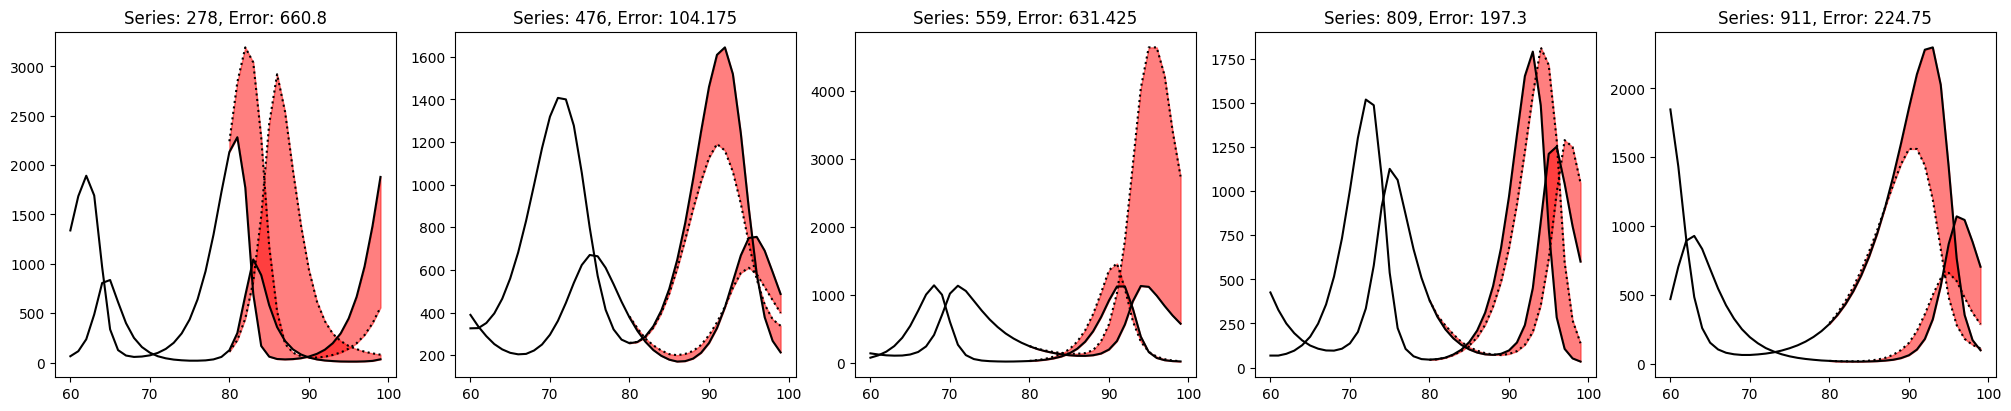


Experiment 3b - 0


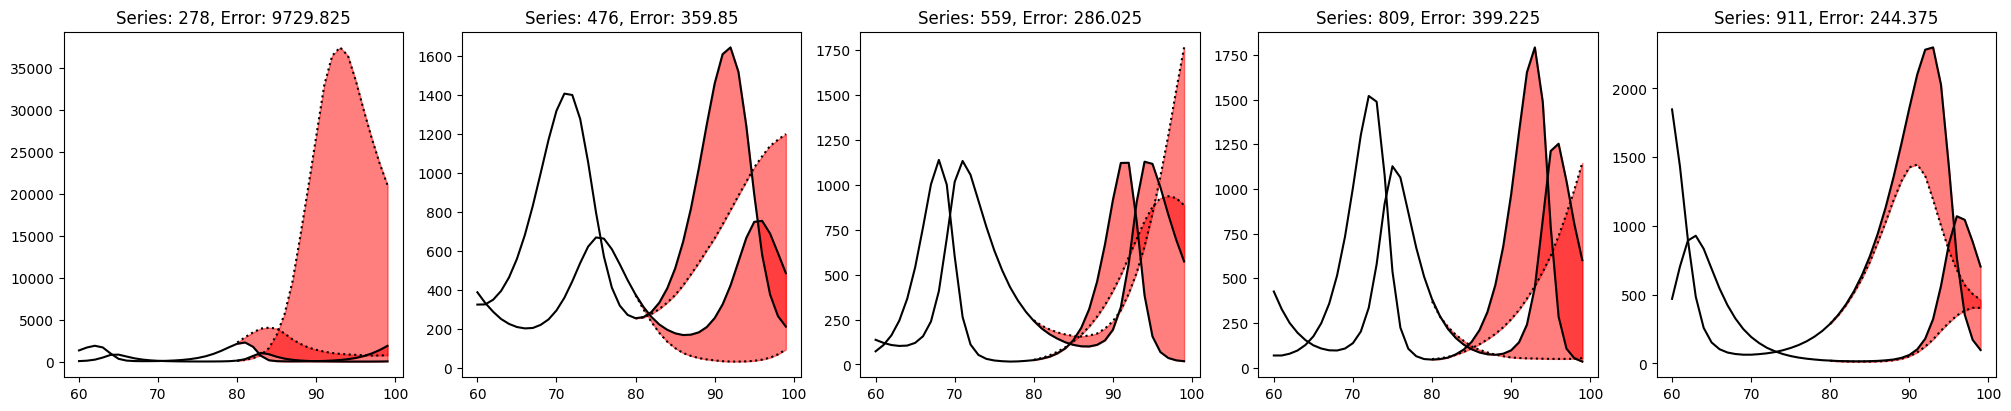


Experiment 3b - 2


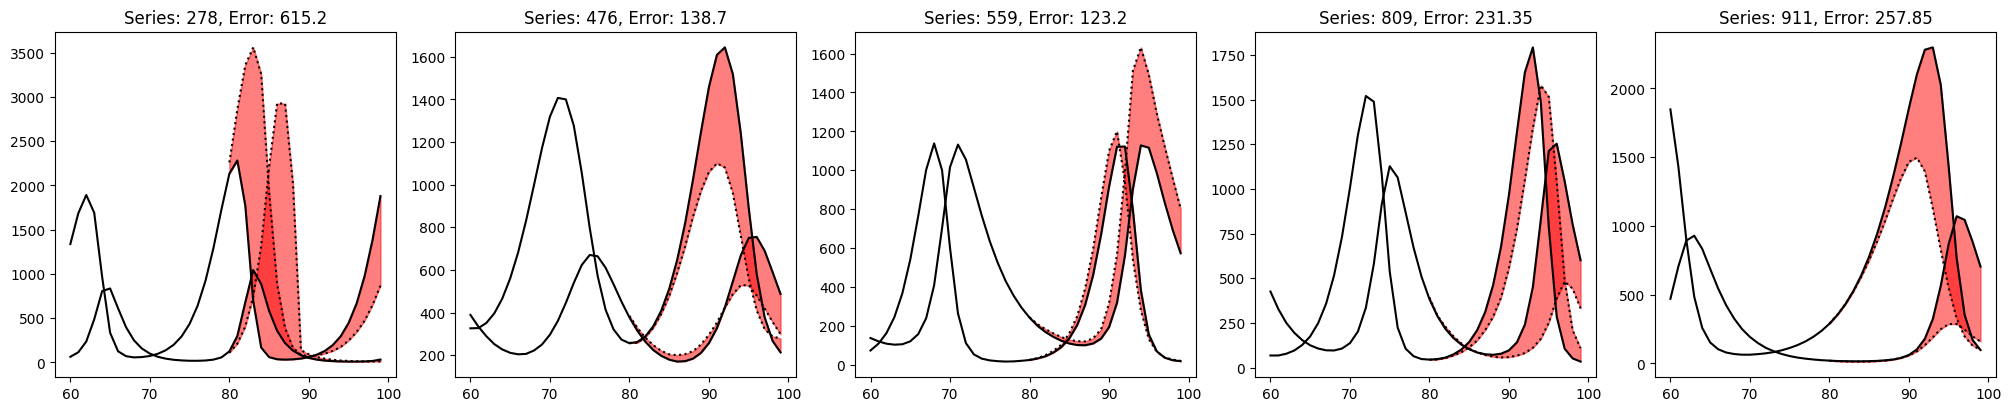

,series_id,MAE_1,max_dist_1,MAE_0,max_dist_0,MAE_2,max_dist_2
0,278,660.800,2561.0,9729.825,37399.0,615.20,3092.0
1,476,104.175,484.0,359.850,987.0,138.70,564.0
2,559,631.425,3654.0,286.025,1191.0,123.20,609.0
3,809,197.300,1005.0,399.225,1336.0,231.35,961.0
4,911,224.750,1196.0,244.375,1108.0,257.85,1200.0


In [2]:
from m2_cw.inference import visualise_forecasts
from pathlib import Path
import json
import re
import pandas as pd
from functools import reduce

forecasts = [ file for file in Path.cwd().iterdir() if "forecast_eval_1" in str(file) ]
assert len(forecasts) == 3

dfs = []
for forecast in forecasts:
    match = re.search(r"forecast_eval_1_expt_(\d+)_", str(forecast))
    if match:
        expt_number = match.group(1)
    else:
        raise TypeError(f"No experiment id found in path {forecast}")
    print(f"\nExperiment 3b - {expt_number}")
    df = visualise_forecasts(forecast, plots_per_row=5, eval_set="val", prefix=20)
    df = df.rename(columns={"MAE": f"MAE_{expt_number}",
                            "max_dist": f"max_dist_{expt_number}"})
    dfs.append(df)

df = reduce(lambda left, right: pd.merge(left, right, on="series_id"), dfs)
df.head()

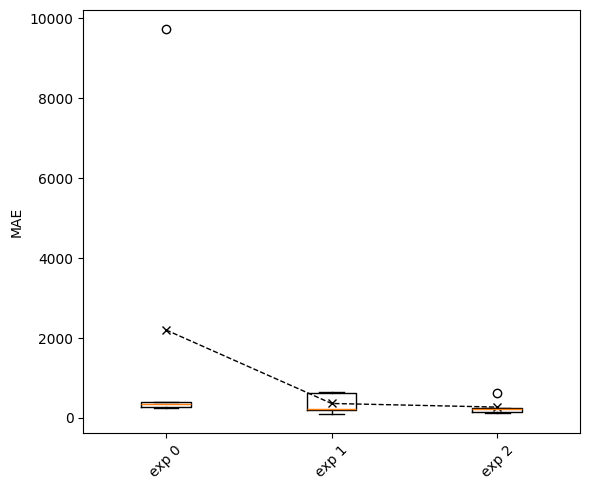

[2203.86, 363.68999999999994, 273.26000000000005]
[359.85, 224.75, 231.35]
\begin{tabular}{rrr}
\hline
   Context Length &   Avg MAE &   Median MAE \\
\hline
              128 &   2203.86 &       359.85 \\
              512 &    363.69 &       224.75 \\
              768 &    273.26 &       231.35 \\
\hline
\end{tabular}


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


labels = []
data = []
means = []
medians = []
for i in range(3):
    target = f"MAE_{i}"
    data.append(df[target].to_numpy())
    means.append(data[-1].mean())
    medians.append(np.median(data[-1]))
    labels.append(f"exp {i}")
data = np.stack(data, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.boxplot(data, tick_labels=labels)
ax.plot(range(1, 4), means, marker="x", ls="--", lw=1, c="k")

plt.ylabel("MAE")
plt.xticks(rotation=45)  # optional, makes x-axis labels more readable
plt.tight_layout()
plt.show()

contexts = [128, 512, 768]

table_data = [["Context Length", "Avg MAE", "Median MAE"]] + [ [contexts[i], means[i], medians[i]] for i in range(3) ]

print(means)
print(medians)
print(tabulate(table_data, headers="firstrow", tablefmt="latex"))

128 is useless. Let's evaluate on the other 15 from the bad set. We also have no need to evaluate on the 512 since we have already trained that model, and thus we know how well it performs


Experiment 3b - 2


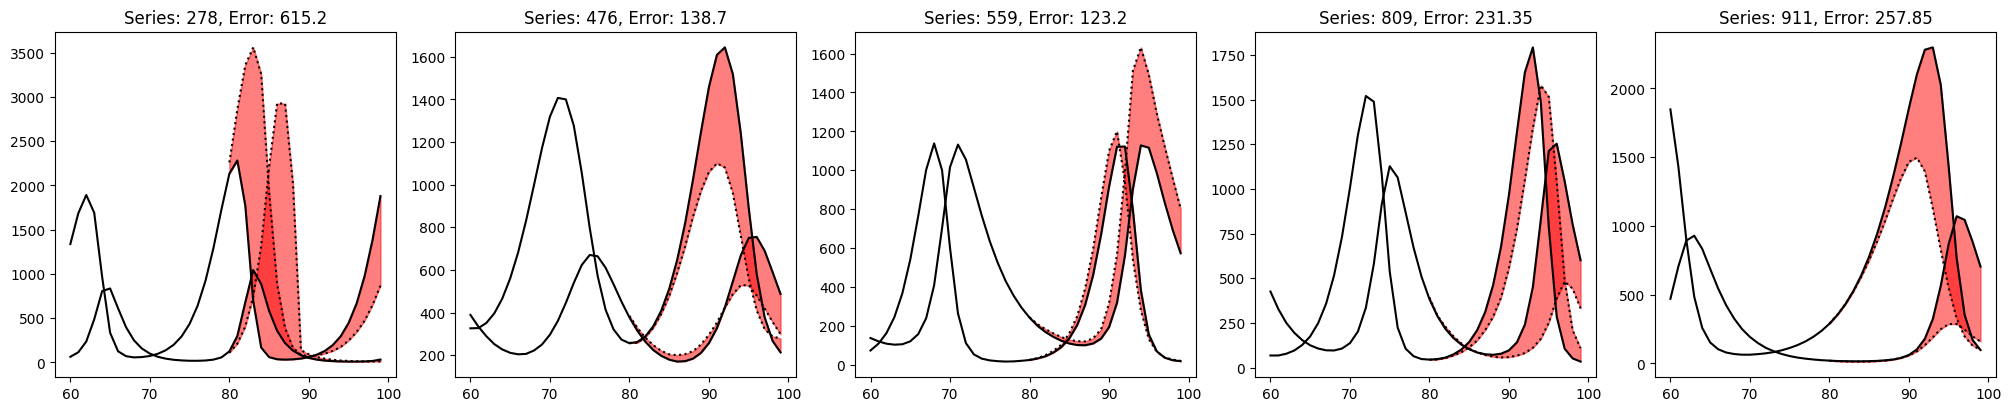

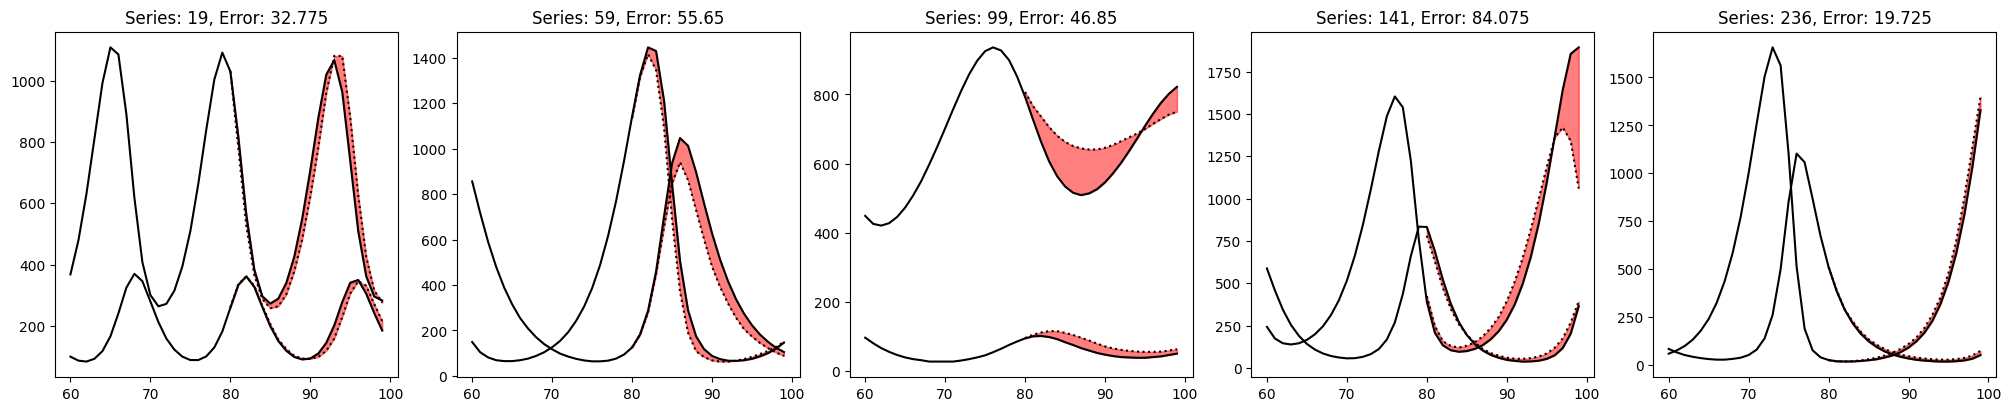

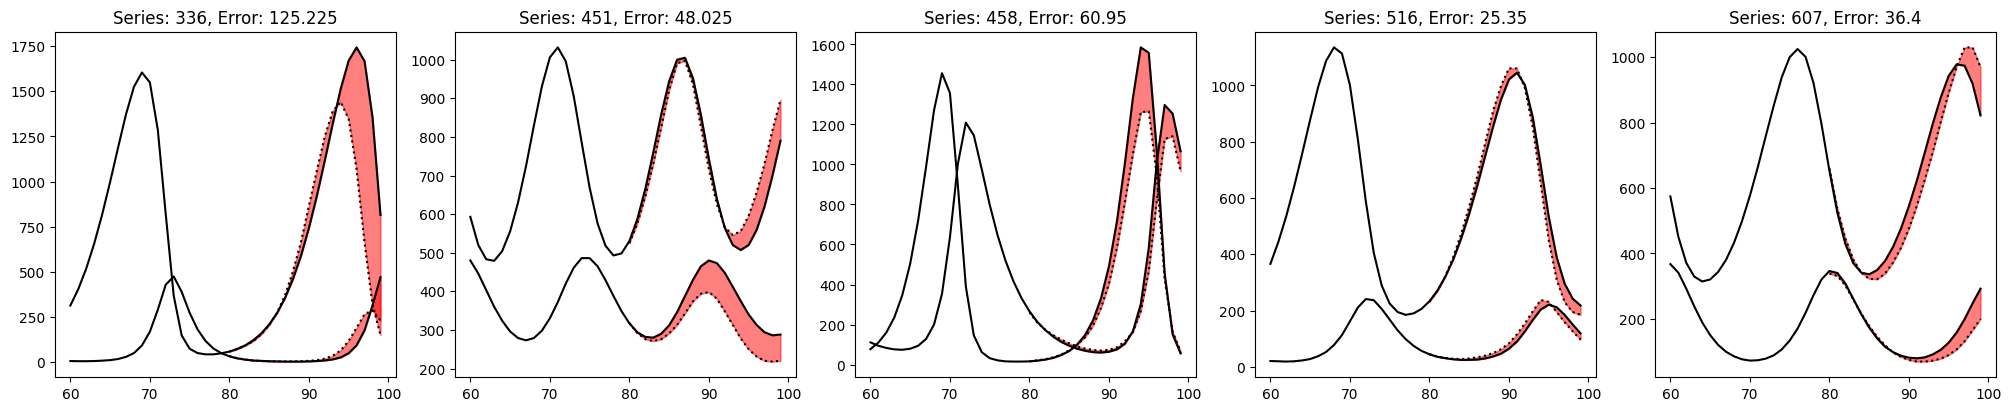

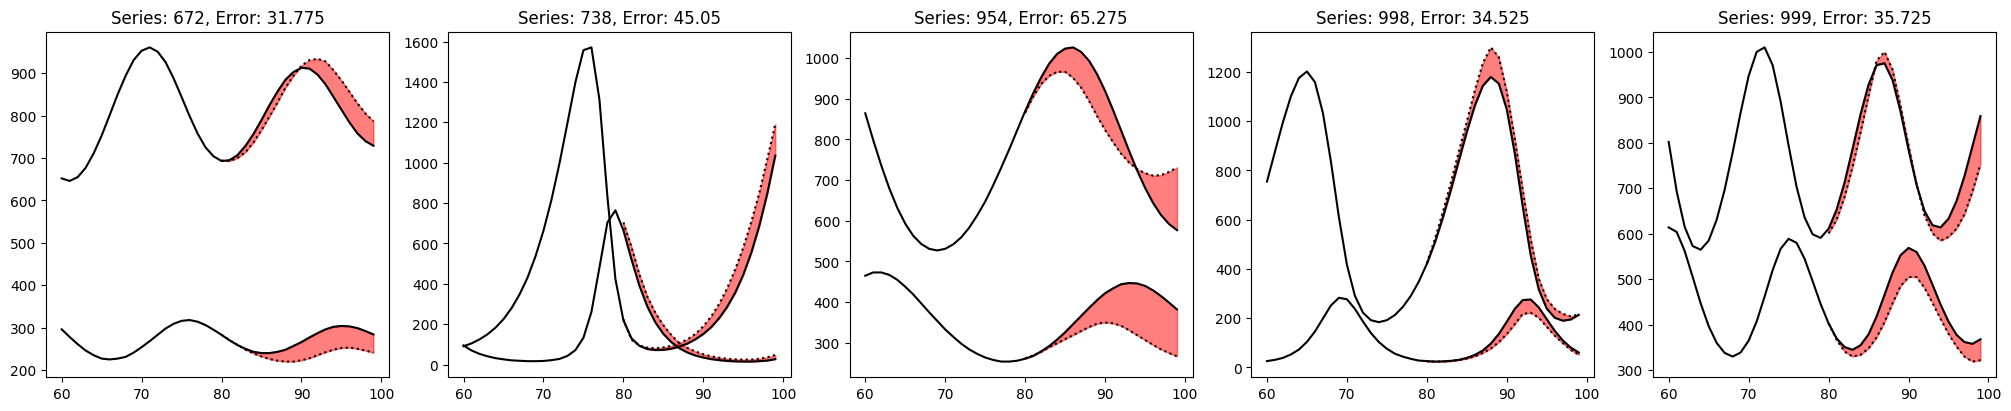

,series_id,MAE_2,max_dist_2
0,278,615.20,3092.0
1,476,138.70,564.0
2,559,123.20,609.0
3,809,231.35,961.0
4,911,257.85,1200.0


In [6]:
forecasts = [ file for file in Path.cwd().iterdir() if "forecast_combined" in str(file) ]
assert len(forecasts) == 1

dfs = []
for forecast in forecasts:
    match = re.search(r"expt_(\d+)_", str(forecast))
    if match:
        expt_number = match.group(1)
    else:
        raise TypeError(f"No experiment id found in path {forecast}")
    print(f"\nExperiment 3b - {expt_number}")
    df = visualise_forecasts(forecast, plots_per_row=5, eval_set="val", prefix=20)
    df = df.rename(columns={"MAE": f"MAE_{expt_number}",
                            "max_dist": f"max_dist_{expt_number}"})
    dfs.append(df)

df = reduce(lambda left, right: pd.merge(left, right, on="series_id"), dfs)
df.head()

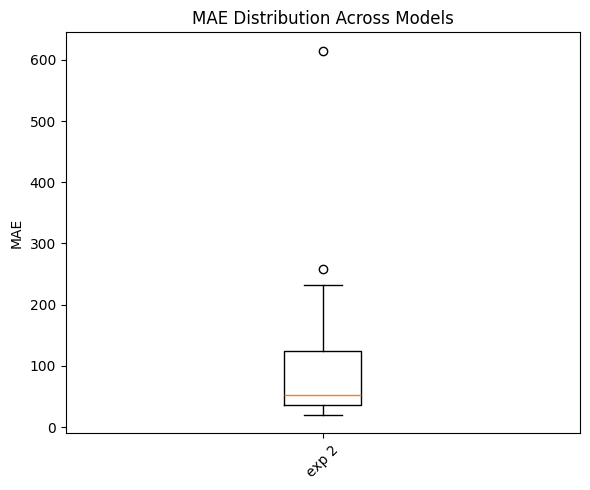

105.68374999999999


In [7]:
import matplotlib.pyplot as plt
import numpy as np


labels = []
data = []
for i in [2]:
    target = f"MAE_{i}"
    data.append(df[target].to_numpy())
    labels.append(f"exp {i}")
data = np.stack(data, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.boxplot(data, tick_labels=labels)

plt.title("MAE Distribution Across Models")
plt.ylabel("MAE")
plt.xticks(rotation=45)  # optional, makes x-axis labels more readable
plt.tight_layout()
plt.show()

print(np.mean(data))